<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

The from google.colab import drive statement you provided is used to mount Google Drive within a Colab notebook. When you run this code in a Google Colab notebook, it prompts you to authenticate and authorize access to your Google Drive account. Once authorized, you can access files and folders stored in your Google Drive directly from your Colab notebook.



In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
pwd

'/content'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL  
#Python Imaging Library (PIL)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

The code you provided appears to be using TensorFlow's `tf.keras.utils.get_file` function to download a dataset from a specified URL and store it in a local directory. Let's break down what each part of the code does:

1. `data_dir`: This is a variable that will store the local directory where the downloaded dataset will be saved.

2. `tf.keras.utils.get_file`: This is a function provided by TensorFlow's Keras API to download a file from a URL and return its local path.

3. `'flower_photos'`: This is the name that will be used for the downloaded dataset file.

4. `origin=dataset_url`: `dataset_url` is expected to be a variable or a string containing the URL from which the dataset will be downloaded. The `origin` parameter specifies the source URL of the file.

5. `cache_dir='.'`: This parameter specifies the directory where the downloaded dataset should be stored. In this case, `.` refers to the current directory, which means that the dataset will be saved in the same directory where this code is executed.

6. `untar=True`: This parameter indicates that the downloaded file should be untarred (uncompressed) if it is a tar archive file. This is typically used when you are downloading a compressed dataset.

Here's what happens when this code is executed:
1. The `get_file` function will download the dataset from the specified URL (`dataset_url`) and save it in the current directory with the name 'flower_photos'.
2. If the downloaded file is a tar archive (common for datasets), it will be automatically extracted (untarred).

After executing this code, you should have a local directory named 'flower_photos' in the current directory, containing the downloaded and potentially untarred dataset files. You can then use this local dataset for further processing, such as training machine learning models.

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'./datasets/flower_photos'

The provided code is converting the `data_dir` variable into a `pathlib.Path` object and then displaying it. `pathlib` is a Python library for working with file and directory paths in a more user-friendly and platform-independent way.

Here's what this code does:

1. `data_dir`: This variable likely contains the path to the directory where the dataset was downloaded and possibly untarred (as mentioned in your previous code).

2. `pathlib.Path(data_dir)`: This line converts the `data_dir` variable into a `pathlib.Path` object. The `pathlib.Path` constructor is used to create a pathlib object that represents the path to a file or directory.

3. `data_dir`: After converting `data_dir` into a pathlib object, it is displayed. This will show the path to the directory, which can be useful for further file operations using `pathlib` or other Python file handling functions.

Using `pathlib` can be more convenient and platform-independent than working with plain strings when you need to perform operations on file paths, such as joining paths, accessing parent directories, or listing directory contents.

`pathlib` and `data_dir` serve different purposes, and they are not inherently comparable because they represent different concepts in file and directory handling. Let me explain their differences:

1. `data_dir`:
   - `data_dir` is a variable that you defined in your earlier code. It represents a directory path where you have stored a dataset or some data.
   - The value of `data_dir` is typically a string that represents a file system path as plain text, such as `'./flower_photos'`.
   - You can use `data_dir` to access or manipulate the files and directories in that specific location using standard file I/O functions like `os` or `os.path`.

2. `pathlib`:
   - `pathlib` is a Python library that provides a more object-oriented and platform-independent way to work with file and directory paths.
   - You can create `pathlib.Path` objects to represent file and directory paths. These objects have methods and properties that make it easier to perform operations on paths, such as joining paths, accessing parent directories, checking existence, and more.
   - It doesn't directly represent the data within the directory but is a tool for working with paths to data.

In your code, you converted the `data_dir` (a plain string representing a directory path) into a `pathlib.Path` object. This allows you to use the methods and properties of `pathlib.Path` to work with the directory path more conveniently.

Here's an example to illustrate the difference:

```python
import pathlib

data_dir = './flower_photos'  # String representing a directory path
data_dir_pathlib = pathlib.Path(data_dir)  # Create a pathlib.Path object

# Access parent directory using plain string
parent_dir = os.path.dirname(data_dir)

# Access parent directory using pathlib
parent_dir_pathlib = data_dir_pathlib.parent

# Check if the directory exists using plain string
exists = os.path.exists(data_dir)

# Check if the directory exists using pathlib
exists_pathlib = data_dir_pathlib.exists()
```

In summary, `data_dir` represents a directory path as a plain string, while `pathlib` is a library for working with file and directory paths in a more versatile and platform-independent manner. Converting `data_dir` into a `pathlib.Path` object allows you to use the features provided by `pathlib` when dealing with file paths.

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In the expression `data_dir.glob('*/*.jpg')`, `*` is a wildcard character used in the context of file paths. 

- The first `*` represents any directory within `data_dir`. It's saying "look for any directory within `data_dir`".
- The second `*` represents any file name within those directories. It's saying "look for any file with a `.jpg` extension within each of those directories".

So, altogether, this expression is asking to find all JPEG files (`*.jpg`) within any directory (`*`) that is located directly within `data_dir`.

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4414081772_8a0e8a1327.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18250039435_7654bc11be_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7804213238_1d92ae5edb_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3922005347_7b6fb82fcd.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2694860538_b95d60122c_m.jpg')]

## glob
What Is the Glob Module in Python? The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name. It can be used to search CSV files and for text in files

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3141434519_aaa64c4f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2364976562_a184463083_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/9216324117_5fa1e2bc25_n.jpg')]

PIL: https://pypi.org/project/pillow/

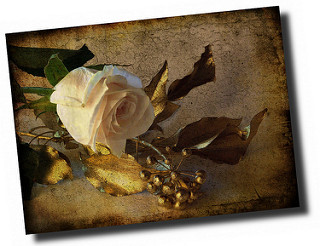

In [9]:
PIL.Image.open(str(roses[1]))

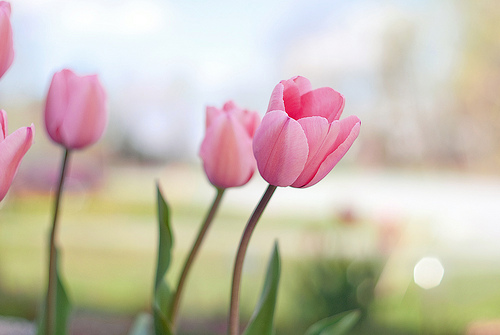

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

The `flowers_images_dict` is a Python dictionary where keys represent different types of flowers ('roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'), and the values are lists containing paths to images of each respective type of flower.

Let's break it down:

- `'roses': list(data_dir.glob('roses/*'))`: This line assigns to the key `'roses'` a list of paths obtained by using the `glob` method to search for files within the 'roses' directory in `data_dir`.
  
- `'daisy': list(data_dir.glob('daisy/*'))`: Similarly, this line assigns to the key `'daisy'` a list of paths obtained by searching for files within the 'daisy' directory in `data_dir`.
  
- `'dandelion': list(data_dir.glob('dandelion/*'))`: Again, this line assigns to the key `'dandelion'` a list of paths obtained by searching for files within the 'dandelion' directory in `data_dir`.
  
- `'sunflowers': list(data_dir.glob('sunflowers/*'))`: Similarly, this line assigns to the key `'sunflowers'` a list of paths obtained by searching for files within the 'sunflowers' directory in `data_dir`.
  
- `'tulips': list(data_dir.glob('tulips/*'))`: Similarly, this line assigns to the key `'tulips'` a list of paths obtained by searching for files within the 'tulips' directory in `data_dir`.

So, `flowers_images_dict` is a dictionary where each key corresponds to a type of flower, and the associated value is a list containing paths to images of that particular type of flower.

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3141434519_aaa64c4f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2364976562_a184463083_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/9216324117_5fa1e2bc25_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [18]:
img.shape

(240, 320, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [23]:
X.shape

(3670, 180, 180, 3)

In [24]:
X

array([[[[ 26,  28,  19],
         [ 24,  21,  33],
         [ 24,  23,  28],
         ...,
         [ 52,  65,  84],
         [ 54,  52,  63],
         [ 49,  50,  64]],

        [[ 27,  29,  37],
         [ 37,  35,  31],
         [ 28,  18,  22],
         ...,
         [ 84,  75, 141],
         [ 92,  78, 104],
         [120, 111, 120]],

        [[ 25,  28,  23],
         [ 62,  60,  46],
         [ 28,  11,  20],
         ...,
         [ 69,  68, 110],
         [184, 188, 202],
         [132, 140, 140]],

        ...,

        [[ 53,  86,  78],
         [ 64,  88,  79],
         [ 64,  90,  90],
         ...,
         [ 45,  46,  36],
         [ 65,  70,  55],
         [ 88,  95,  75]],

        [[ 84, 110, 104],
         [ 82, 115, 100],
         [ 94, 126, 116],
         ...,
         [ 42,  45,  33],
         [ 71,  77,  60],
         [ 80,  87,  69]],

        [[ 44,  47,  48],
         [ 75, 104,  91],
         [101, 128, 115],
         ...,
         [ 58,  62,  50],
        

<h3 style='color:purple'>Train test split</h3>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

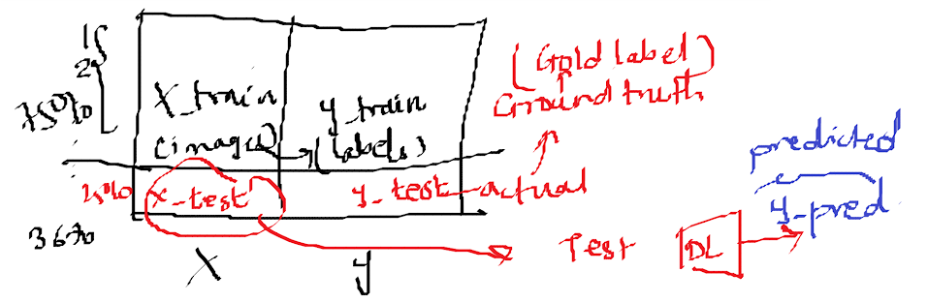

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
X_train_scaled[:5]

array([[[[0.00392157, 0.16470588, 0.00392157],
         [0.00784314, 0.27058824, 0.01176471],
         [0.00784314, 0.31372549, 0.05882353],
         ...,
         [0.00784314, 0.1372549 , 0.01568627],
         [0.00392157, 0.11372549, 0.04313725],
         [0.00784314, 0.08235294, 0.05490196]],

        [[0.00392157, 0.15686275, 0.00784314],
         [0.00392157, 0.26666667, 0.01176471],
         [0.00392157, 0.31764706, 0.05882353],
         ...,
         [0.00392157, 0.14117647, 0.00784314],
         [0.        , 0.11764706, 0.02745098],
         [0.01568627, 0.09411765, 0.04313725]],

        [[0.00784314, 0.15294118, 0.00784314],
         [0.00784314, 0.2627451 , 0.01568627],
         [0.        , 0.31372549, 0.0627451 ],
         ...,
         [0.00784314, 0.14901961, 0.00392157],
         [0.        , 0.11764706, 0.01176471],
         [0.01176471, 0.08627451, 0.01568627]],

        ...,

        [[0.        , 0.38431373, 0.03137255],
         [0.        , 0.41176471, 0.        ]

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 13s 20ms/step - loss: 1.3536 - accuracy: 0.4262
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 1.0089 - accuracy: 0.6137
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8225 - accuracy: 0.6930
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6324 - accuracy: 0.7707
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.4523 - accuracy: 0.8339
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.3062 - accuracy: 0.8997
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.2039 - accuracy: 0.9360
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0989 - accuracy: 0.9691
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0660 - accuracy: 0.9822
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0312 - accuracy: 0.9924
Epoch 11

In TensorFlow and Keras, when you specify `from_logits=True` in the `SparseCategoricalCrossentropy` loss function, it means that the function assumes the input values are raw logits, which are the unnormalized predictions produced by the last layer of your neural network, before applying an activation function like softmax.

Here's a breakdown of what this parameter does:

1. **Logits**: Logits are the raw, unnormalized predictions output by the neural network's final layer. They represent the scores assigned to each class before passing through any activation function. Logits can be any real number, positive or negative.

2. **Softmax Activation**: Normally, in multi-class classification tasks, you use a softmax activation function on the output layer of your neural network. This function squashes the logits into probabilities, ensuring that they sum up to 1 and are in the range [0, 1].

3. **Without `from_logits=True`**: If you set `from_logits=False` (the default), the `SparseCategoricalCrossentropy` function expects that the predictions passed to it have already been through a softmax activation. It internally applies the softmax function again before computing the cross-entropy loss. This is useful when you have probabilities as outputs of your network.

4. **With `from_logits=True`**: When you set `from_logits=True`, you're indicating to the loss function that the predictions are raw logits. In this case, the loss function will apply softmax internally before computing the cross-entropy loss. This can be beneficial in terms of numerical stability during computation, especially if the logits are large positive numbers.

In summary, `from_logits=True` simplifies your workflow by allowing you to work directly with logits without explicitly applying a softmax activation function before passing the predictions to the loss function. This is particularly useful in scenarios where the numerical stability of softmax computation might be a concern.

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 3.1225 - accuracy: 0.6362


[3.122492551803589, 0.6361655592918396]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[-13.155773 ,  19.618706 ,  -9.165794 , -11.7280035, -10.94397  ],
       [ 23.686365 , -15.824316 ,  12.504185 , -26.600967 ,  32.588966 ],
       [  3.8411453,  -3.8849492,   7.1766953,  -6.1216516,   5.989029 ],
       ...,
       [-18.682734 , -22.064928 ,   1.0921205,  16.855156 ,  -1.3389549],
       [  2.0700386,   0.8612722,  -7.7653093,  -5.3644547,  10.592791 ],
       [-13.338904 , -22.31115  ,  -2.564227 ,  14.543275 ,  -5.488331 ]],
      dtype=float32)

In [31]:
scores = tf.nn.softmax(predictions)

In [32]:
scores

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[5.8374699e-15, 1.0000000e+00, 3.1553709e-13, 2.4338663e-14,
        5.3308774e-14],
       [1.3601611e-04, 9.4258099e-22, 1.8933508e-09, 1.9682457e-26,
        9.9986398e-01],
       [2.6552645e-02, 1.1714065e-05, 7.4596560e-01, 1.2511803e-06,
        2.2746879e-01],
       ...,
       [3.6820655e-16, 1.2509013e-17, 1.4262659e-07, 9.9999988e-01,
        1.2542901e-08],
       [1.9883997e-04, 5.9366699e-05, 1.0643044e-08, 1.1742062e-07,
        9.9974161e-01],
       [7.7789934e-13, 9.8702294e-17, 3.7179735e-08, 1.0000000e+00,
        1.9970301e-09]], dtype=float32)>

In [33]:
import numpy as np

# Create a list of numbers
numbers = [5.8374699e-15, 1.0000000e+00, 3.1553709e-13, 2.4338663e-14,
        5.3308774e-14]

# Calculate the sum of the numbers
sum = np.sum(numbers)

# Print the sum
print(sum)

1.000000000000399


In [34]:
score = tf.nn.softmax(predictions[0])
print(score)

tf.Tensor([5.8374699e-15 1.0000000e+00 3.1553709e-13 2.4338663e-14 5.3308774e-14], shape=(5,), dtype=float32)


In [35]:
np.argmax(score)

1

In [36]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [40]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

The code snippet you provided appears to be using the `layers.experimental.preprocessing` module from TensorFlow or a similar deep learning library. These layers are used for data augmentation, which is a common technique in computer vision tasks to artificially increase the diversity of the training dataset by applying various transformations to the input images. Data augmentation helps improve the model's robustness and generalization. Let me explain what each of these lines does:

1. `layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3))`: This line applies horizontal random flipping to the input images. It flips images horizontally (left to right) with a probability of 0.5, effectively doubling the size of the training dataset. The `input_shape` argument specifies the expected shape of the input images, which is (180, 180, 3) in this case, indicating images with a height and width of 180 pixels and 3 color channels (RGB).

2. `layers.experimental.preprocessing.RandomRotation(0.1)`: This line applies random rotation to the input images. It randomly rotates the images by a maximum angle of 0.1 radians (approximately 5.7 degrees) in either clockwise or counterclockwise direction. This rotation helps the model become more invariant to slight variations in object orientation.

3. `layers.experimental.preprocessing.RandomZoom(0.1)`: This line applies random zoom to the input images. It randomly scales the images by a factor of up to 10%, both in and out. This simulates the effect of objects being closer or farther from the camera, helping the model generalize better to objects at different scales.

These data augmentation techniques are commonly used in deep learning workflows for image classification or object recognition tasks. By applying these transformations to the training data, you can help the neural network learn to recognize objects in different orientations, positions, and scales, making it more robust and capable of better generalization to real-world scenarios. These layers are usually used as part of a data preprocessing pipeline before the input data is fed into a neural network model for training.

**Original Image**

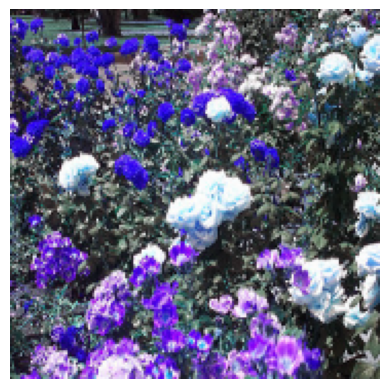

In [41]:
plt.axis('off')
plt.imshow(X[0])

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [43]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 29ms/step - loss: 1.2756 - accuracy: 0.4480
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0118 - accuracy: 0.5992
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9311 - accuracy: 0.6308
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8401 - accuracy: 0.6657
Epoch 5/30
86/86 [==============================] - 3s 29ms/step - loss: 0.8000 - accuracy: 0.6955
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7556 - accuracy: 0.7017
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7197 - accuracy: 0.7224
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6873 - accuracy: 0.7304
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6621 - accuracy: 0.7485
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.6361 - accuracy: 0.7620
Epoch 11/

In [44]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 0.8786 - accuracy: 0.7320


[0.878574550151825, 0.7320261597633362]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**